
#  **Project Name - Telecom Churn Analysis**




Project Type - EDA

Contribution - Individual


# **Problem Statement**

Anticipating customer churn holds paramount significance for any business, enabling the identification of clients likely to discontinue using their services.

Within the telecom sector, customers enjoy the flexibility to choose from various service providers and actively switch between operators. Amidst this fiercely competitive landscape, the telecommunications industry contends with an average annual churn rate ranging from 15-25%. Considering the substantial cost – 5-10 times more – associated with acquiring a new customer compared to retaining an existing one, prioritizing customer retention has surpassed the significance of customer acquisition.

For many established operators, preserving highly lucrative customers stands as the foremost business objective. To mitigate customer churn, telecom companies must prognosticate which customers are at elevated risk of discontinuation. This project involves an in-depth analysis of customer-level data from a leading telecom firm, employing exploratory data analysis to pinpoint the primary indicators driving customer attrition from the company.

**Define Your Business Objective?**

Reducing Customer Churn Rate

# **1.Knowing data**

### Import libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from functools import reduce

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
Df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Telecom Churn.csv")

### Dataset First View

In [ ]:
Df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Dataset Rows & Columns
Df.shape

(3333, 20)

In [ ]:
# Dataset Info
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Dataset Describe
Df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
# Dataset Duplicate Value Count
len(Df[Df.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
print(Df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


What did you know about your dataset?

It's a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service(like port service in India). The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

### **2.Understanding Your Variables**

In [ ]:
# Dataset Columns
Df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

 **Variables Description**

* **State:** Categorical variable denoting the state (object type).
* **Account length:** Numerical variable indicating the length of the account (int64 type).
* **Area code:** Numerical variable representing the area code (int64 type).
* **International plan:** Categorical variable indicating whether the customer has an international plan (object type).
* **Voice mail plan:** Categorical variable indicating whether the customer has a voice mail plan (object type).
* **Number vmail messages:** Numerical variable indicating the number of voice mail messages (int64 type).
* **Total day minutes:** Numerical variable representing the total number of minutes used during the day (float64 type).
* **Total day calls:** Numerical variable representing the total number of calls made during the day (int64 type).
* **Total day charge:** Numerical variable representing the total charge for day usage (float64 type).
* **Total eve minutes:** Numerical variable representing the total number of minutes used during the evening (float64 type).
* **Total eve calls:** Numerical variable representing the total number of calls made during the evening (int64 type).
*  **Total eve charge:** Numerical variable representing the total charge for evening usage (float64 type).
* **Total night minutes:** Numerical variable representing the total number of minutes used during the night (float64 type).
* **Total night calls:** Numerical variable representing the total number of calls made during the night (int64 type).
* **Total night charge:** Numerical variable representing the total charge for night usage (float64 type).
* **Total intl minutes:** Numerical variable representing the total number of international minutes used (float64 type).
* **Total intl calls:** Numerical variable representing the total number of international calls made (int64 type).
* **Total intl charge:** Numerical variable representing the total charge for international usage (float64 type).
* **Customer service calls:** Numerical variable representing the number of customer service calls made (int64 type).
* **Churn:** Boolean variable indicating whether the customer has churned (bool type).

In [ ]:
#Check Unique Values for each variable.
for i in Df.columns.tolist():
  print("Number of unique values in ",i,"is",Df[i].nunique())

Number of unique values in  State is 51
Number of unique values in  Account length is 212
Number of unique values in  Area code is 3
Number of unique values in  International plan is 2
Number of unique values in  Voice mail plan is 2
Number of unique values in  Number vmail messages is 46
Number of unique values in  Total day minutes is 1667
Number of unique values in  Total day calls is 119
Number of unique values in  Total day charge is 1667
Number of unique values in  Total eve minutes is 1611
Number of unique values in  Total eve calls is 123
Number of unique values in  Total eve charge is 1440
Number of unique values in  Total night minutes is 1591
Number of unique values in  Total night calls is 120
Number of unique values in  Total night charge is 933
Number of unique values in  Total intl minutes is 162
Number of unique values in  Total intl calls is 21
Number of unique values in  Total intl charge is 162
Number of unique values in  Customer service calls is 10
Number of unique

# ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
  # maqking copy of dataset
  df=Df.copy()
  # checking for True value of Churn values and their count
  df_churn=df[df["Churn"]==True]
  print(df_churn.count())
  print("\n")
  print(df['Churn'].value_counts())

State                     483
Account length            483
Area code                 483
International plan        483
Voice mail plan           483
Number vmail messages     483
Total day minutes         483
Total day calls           483
Total day charge          483
Total eve minutes         483
Total eve calls           483
Total eve charge          483
Total night minutes       483
Total night calls         483
Total night charge        483
Total intl minutes        483
Total intl calls          483
Total intl charge         483
Customer service calls    483
Churn                     483
dtype: int64


False    2850
True      483
Name: Churn, dtype: int64


In [ ]:
type(df.head())

pandas.core.frame.DataFrame

In [ ]:
pd.DataFrame(df.groupby('Area code')['Churn'].value_counts().reset_index(name="Count"))


,Area code,Churn,Count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


In [ ]:
# Churn data groupby State Wise
pd.DataFrame(df.groupby('State')['Churn'].value_counts().reset_index(name="Count"))


,State,Churn,Count
0,AK,False,49
1,AK,True,3
2,AL,False,72
3,AL,True,8
4,AR,False,44
...,...,...,...
97,WI,True,7
98,WV,False,96
99,WV,True,10
100,WY,False,68


In [ ]:
# Unique_state
uni_state=df['State'].unique()
print(uni_state)
print("",end="\n")
# count of Unique_state
len(uni_state)

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']



51

### Analysis begins

In [ ]:
# Customer churn with international plan
df_churn_int=df[(df['Churn']==True) & (df["International plan"]=='Yes')]
# Customer churn without international plan
df_churn_no_int=df[(df["Churn"]==True) & (df["International plan"]=='No')]

In [ ]:
df_churn_int.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
115,ME,36,510,Yes,Yes,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,True
144,VT,117,408,Yes,No,0,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True
198,ME,131,510,Yes,Yes,26,292.9,101,49.79,199.7,97,16.97,255.3,127,11.49,13.8,7,3.73,4,True
214,FL,70,510,Yes,No,0,226.7,98,38.54,228.1,115,19.39,73.2,93,3.29,17.6,4,4.75,2,True


In [ ]:
# Number of customers churn with international plan state-vise
df_churn_int['State'].value_counts()

MD    6
ME    6
NC    6
NV    6
KS    6
MI    6
MA    5
IL    5
MN    5
DE    5
AR    4
TX    4
NY    4
CT    3
WA    3
NH    3
OH    3
OK    3
RI    3
GA    3
WY    3
VA    3
PA    3
MS    3
NJ    3
WI    3
AL    3
CO    2
TN    2
VT    2
FL    2
SD    2
WV    2
KY    2
CA    2
NM    2
AZ    1
SC    1
MO    1
UT    1
ID    1
OR    1
ND    1
MT    1
AK    1
Name: State, dtype: int64

In [ ]:
# Number of customers churn without international plan state-vise
df_churn_no_int['State'].value_counts()

NJ    15
TX    14
SC    13
MT    13
MD    11
NY    11
WA    11
MS    11
OR    10
MI    10
MN    10
CT     9
UT     9
IN     9
ID     8
NV     8
WV     8
AR     7
CO     7
KS     7
ME     7
OH     7
CA     7
VT     6
FL     6
WY     6
KY     6
OK     6
MA     6
SD     6
MO     6
NH     6
PA     5
NE     5
NC     5
AL     5
GA     5
DC     5
ND     5
DE     4
WI     4
NM     4
LA     4
RI     3
TN     3
IA     3
AZ     3
HI     3
VA     2
AK     2
Name: State, dtype: int64

In [ ]:
df_int_voi=df[(df[(df["Churn"]==True) & (df["International plan"]==True)] & df[(df['Churn']==True) & (df["Voice mail plan"]==True)])]

In [ ]:
# Customer churn with international plan and voice mail plan
df_int_voi=df_churn[(df_churn["International plan"]=='Yes') & (df_churn["Voice mail plan"]=='Yes')]


# Customer churn with international plan and no voice mail plan
df_int_no_voi=df_churn[(df_churn["International plan"]=='Yes') & (df_churn["Voice mail plan"]=='No')]

# Customer churn with no international plan and voice mail plan
df_no_int_voi=df_churn[(df_churn["International plan"]=='No') & (df_churn["Voice mail plan"]=='Yes')]

# Customer churn with no international plan and no voice mail plan
df_no_int_no_voi=df_churn[(df_churn["International plan"]=='No') & (df_churn["Voice mail plan"]=='No')]

In [ ]:
# printing shape of above international and voice mailm plans
print(df_int_voi.shape)
print(df_int_no_voi.shape)
print(df_no_int_voi.shape)
print(df_no_int_no_voi.shape)

(36, 20)
(101, 20)
(44, 20)
(302, 20)


In [ ]:
df_no_int_no_voi.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True


In [ ]:
# number of voice mail send to international plan and voice mail plan
df_int_voi['Number vmail messages'].value_counts()

29    5
26    4
41    3
32    3
28    3
42    2
35    2
16    1
44    1
24    1
31    1
18    1
38    1
15    1
21    1
19    1
27    1
33    1
37    1
20    1
22    1
Name: Number vmail messages, dtype: int64

In [ ]:
print("Customers with international plan and with voice mail plan voice message sent  mean:",df_int_voi['Number vmail messages'].mean())



Customers with international plan and with voice mail plan voice message sent  mean: 29.75


In [ ]:
# number of voice mail send to international plan and no voice mail plan
df_int_no_voi['Number vmail messages'].value_counts()

0    101
Name: Number vmail messages, dtype: int64

In [ ]:
# number of voice mail send to no international plan and voice mail plan
print(df_no_int_voi['Number vmail messages'].value_counts())
print("\n")
print("Customers with no international plan and with voice mail plan voice message sent  mean:",df_no_int_voi['Number vmail messages'].mean())

33    5
31    4
36    4
29    3
32    3
28    3
30    2
27    2
34    2
42    2
26    2
35    2
21    1
22    1
37    1
45    1
44    1
18    1
20    1
48    1
40    1
17    1
Name: Number vmail messages, dtype: int64


Customers with no international plan and with voice mail plan voice message sent  mean: 31.818181818181817


In [ ]:
# number of voice mail send to no international plan and no voice mail plan
df_no_int_no_voi['Number vmail messages'].value_counts()

0    302
Name: Number vmail messages, dtype: int64

**Now analysis of plans according to time, prices and area**

Time

In [ ]:
# This is an assumption according to data that on average customer is spending this much time for percall
# New columns according to time of customers with  international plan and voice mail plan

df_int_voi['day_duratin_per_call']=df_int_voi['Total day minutes']/df_int_voi['Total day calls']
df_int_voi['eve_duration_per_call']=df_int_voi['Total eve minutes']/df_int_voi['Total eve calls']
df_int_voi['night_duration_per_call']=df_int_voi['Total night minutes']/df_int_voi['Total night calls']
df_int_voi['int_duration_per_call']=df_int_voi['Total intl minutes']/df_int_voi['Total intl calls']

<ipython-input-30-8eb53469080f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_voi['day_duratin_per_call']=df_int_voi['Total day minutes']/df_int_voi['Total day calls']
<ipython-input-30-8eb53469080f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_voi['eve_duration_per_call']=df_int_voi['Total eve minutes']/df_int_voi['Total eve calls']
<ipython-input-30-8eb53469080f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [ ]:
# New columns according to time of customers with  international plan and voice mail plan
# this is an assumption according to data that on average customer is spending this much time for percall
df_int_no_voi['day_duratin_per_call']=df_int_no_voi['Total day minutes']/df_int_no_voi['Total day calls']
df_int_no_voi['eve_duration_per_call']=df_int_no_voi['Total eve minutes']/df_int_no_voi['Total eve calls']
df_int_no_voi['night_duration_per_call']=df_int_no_voi['Total night minutes']/df_int_no_voi['Total night calls']
df_int_no_voi['int_duration_per_call']=df_int_no_voi['Total intl minutes']/df_int_no_voi['Total intl calls']

<ipython-input-31-de9689829eb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_no_voi['day_duratin_per_call']=df_int_no_voi['Total day minutes']/df_int_no_voi['Total day calls']
<ipython-input-31-de9689829eb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_no_voi['eve_duration_per_call']=df_int_no_voi['Total eve minutes']/df_int_no_voi['Total eve calls']
<ipython-input-31-de9689829eb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
# New columns according to time of customers with  international plan and voice mail plan
# this is an assumption according to data that on average customer is spending this much time for percall
df_no_int_voi['day_duratin_per_call']=df_no_int_voi['Total day minutes']/df_no_int_voi['Total day calls']
df_no_int_voi['eve_duration_per_call']=df_no_int_voi['Total eve minutes']/df_no_int_voi['Total eve calls']
df_no_int_voi['night_duration_per_call']=df_no_int_voi['Total night minutes']/df_no_int_voi['Total night calls']
df_no_int_voi['int_duration_per_call']=df_no_int_voi['Total intl minutes']/df_no_int_voi['Total intl calls']

<ipython-input-32-8ba7027d741a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_voi['day_duratin_per_call']=df_no_int_voi['Total day minutes']/df_no_int_voi['Total day calls']
<ipython-input-32-8ba7027d741a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_voi['eve_duration_per_call']=df_no_int_voi['Total eve minutes']/df_no_int_voi['Total eve calls']
<ipython-input-32-8ba7027d741a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
# New columns according to time of customers with  international plan and voice mail plan
# this is an assumption according to data that on average customer is spending this much time for percall
df_no_int_no_voi['day_duratin_per_call']=df_no_int_no_voi['Total day minutes']/df_no_int_no_voi['Total day calls']
df_no_int_no_voi['eve_duration_per_call']=df_no_int_no_voi['Total eve minutes']/df_no_int_no_voi['Total eve calls']
df_no_int_no_voi['night_duration_per_call']=df_no_int_no_voi['Total night minutes']/df_no_int_no_voi['Total night calls']
df_no_int_no_voi['int_duration_per_call']=df_no_int_no_voi['Total intl minutes']/df_no_int_no_voi['Total intl calls']

<ipython-input-33-ff3c0c867443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_no_voi['day_duratin_per_call']=df_no_int_no_voi['Total day minutes']/df_no_int_no_voi['Total day calls']
<ipython-input-33-ff3c0c867443>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_no_voi['eve_duration_per_call']=df_no_int_no_voi['Total eve minutes']/df_no_int_no_voi['Total eve calls']
<ipython-input-33-ff3c0c867443>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Price

In [ ]:
# New columns according to price spend of customers with international plan and voice mail plan
df_int_voi['day_rate_per_min']=df_int_voi['Total day charge']/df_int_voi['Total day minutes']
df_int_voi['eve_rate_per_min']=df_int_voi['Total eve charge']/df_int_voi['Total eve minutes']
df_int_voi['night_rate_per_min']=df_int_voi['Total night charge']/df_int_voi['Total night minutes']
df_int_voi['int_rate_per_min']=df_int_voi['Total intl charge']/df_int_voi['Total intl minutes']

<ipython-input-34-d869f70cbb55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_voi['day_rate_per_min']=df_int_voi['Total day charge']/df_int_voi['Total day minutes']
<ipython-input-34-d869f70cbb55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_voi['eve_rate_per_min']=df_int_voi['Total eve charge']/df_int_voi['Total eve minutes']
<ipython-input-34-d869f70cbb55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
# New columns according to price spend of customers with  international plan and no voice mail plan
df_int_no_voi['day_rate_per_min']=df_int_no_voi['Total day charge']/df_int_no_voi['Total day minutes']
df_int_no_voi['eve_rate_per_min']=df_int_no_voi['Total eve charge']/df_int_no_voi['Total eve minutes']
df_int_no_voi['night_rate_per_min']=df_int_no_voi['Total night charge']/df_int_no_voi['Total night minutes']
df_int_no_voi['int_rate_per_min']=df_int_no_voi['Total intl charge']/df_int_no_voi['Total intl minutes']

<ipython-input-35-e5cc8e2e47e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_no_voi['day_rate_per_min']=df_int_no_voi['Total day charge']/df_int_no_voi['Total day minutes']
<ipython-input-35-e5cc8e2e47e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int_no_voi['eve_rate_per_min']=df_int_no_voi['Total eve charge']/df_int_no_voi['Total eve minutes']
<ipython-input-35-e5cc8e2e47e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
# New columns according to price spend of customers with no international plan and voice mail plan
df_no_int_voi['day_rate_per_min']=df_no_int_voi['Total day charge']/df_no_int_voi['Total day minutes']
df_no_int_voi['eve_rate_per_min']=df_no_int_voi['Total eve charge']/df_no_int_voi['Total eve minutes']
df_no_int_voi['night_rate_per_min']=df_no_int_voi['Total night charge']/df_no_int_voi['Total night minutes']
df_no_int_voi['int_rate_per_min']=df_no_int_voi['Total intl charge']/df_no_int_voi['Total intl minutes']

<ipython-input-36-224cd2145825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_voi['day_rate_per_min']=df_no_int_voi['Total day charge']/df_no_int_voi['Total day minutes']
<ipython-input-36-224cd2145825>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_voi['eve_rate_per_min']=df_no_int_voi['Total eve charge']/df_no_int_voi['Total eve minutes']
<ipython-input-36-224cd2145825>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
# New columns according to price spend of customers with no international plan and no voice mail plan
df_no_int_no_voi['day_rate_per_min']=df_no_int_no_voi['Total day charge']/df_no_int_no_voi['Total day minutes']
df_no_int_no_voi['eve_rate_per_min']=df_no_int_no_voi['Total eve charge']/df_no_int_no_voi['Total eve minutes']
df_no_int_no_voi['night_rate_per_min']=df_no_int_no_voi['Total night charge']/df_no_int_no_voi['Total night minutes']
df_no_int_no_voi['int_rate_per_min']=df_no_int_no_voi['Total intl charge']/df_no_int_no_voi['Total intl minutes']

<ipython-input-37-44c9e1b9e462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_no_voi['day_rate_per_min']=df_no_int_no_voi['Total day charge']/df_no_int_no_voi['Total day minutes']
<ipython-input-37-44c9e1b9e462>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_int_no_voi['eve_rate_per_min']=df_no_int_no_voi['Total eve charge']/df_no_int_no_voi['Total eve minutes']
<ipython-input-37-44c9e1b9e462>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [ ]:
# international plan and voice mail plan dataset describe
df_int_voi.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl charge,Customer service calls,day_duratin_per_call,eve_duration_per_call,night_duration_per_call,int_duration_per_call,day_rate_per_min,eve_rate_per_min,night_rate_per_min,int_rate_per_min
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,109.416667,442.277778,29.750000,192.813889,101.555556,32.779722,211.811111,100.472222,18.004444,187.419444,...,3.320278,1.722222,1.951913,2.199214,1.913000,3.415547,0.170007,0.085003,0.044996,0.270018
std,32.514942,45.647476,7.721491,50.202886,16.306781,8.534531,46.736794,19.395855,3.972455,44.774456,...,0.899328,2.036960,0.607226,0.670252,0.566200,1.628214,0.000019,0.000016,0.000017,0.000251
min,36.000000,408.000000,15.000000,103.200000,59.000000,17.540000,107.100000,61.000000,9.100000,82.300000,...,1.110000,0.000000,0.882051,0.939474,0.769159,0.695000,0.169961,0.084967,0.044957,0.269512
25%,89.750000,413.250000,26.000000,156.400000,89.750000,26.592500,181.875000,93.000000,15.460000,157.750000,...,2.862500,0.000000,1.446053,1.760926,1.542616,2.055357,0.169993,0.084992,0.044986,0.269845
50%,113.000000,415.000000,29.000000,196.150000,102.000000,33.350000,209.350000,99.000000,17.795000,192.450000,...,3.605000,1.000000,1.794322,2.020669,1.907387,3.516667,0.170014,0.085003,0.044999,0.270000
75%,131.500000,510.000000,35.000000,222.450000,114.250000,37.820000,253.400000,112.500000,21.540000,214.125000,...,3.830000,3.000000,2.446778,2.708727,2.066699,4.708333,0.170021,0.085014,0.045006,0.270141
max,188.000000,510.000000,44.000000,292.900000,137.000000,49.790000,312.500000,133.000000,26.560000,271.700000,...,5.400000,9.000000,3.219753,3.558108,3.315000,6.800000,0.170032,0.085033,0.045026,0.270732


In [ ]:
# international plan and no voice mail plan dataset describe
df_int_no_voi.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl charge,Customer service calls,day_duratin_per_call,eve_duration_per_call,night_duration_per_call,int_duration_per_call,day_rate_per_min,eve_rate_per_min,night_rate_per_min,int_rate_per_min
count,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,103.297030,443.504950,0.0,193.914851,97.792079,32.965743,208.412871,99.089109,17.715347,197.213861,...,3.131782,1.564356,2.117822,2.165326,2.036141,4.671625,0.170003,0.085001,0.045000,0.270000
std,38.004354,45.591803,0.0,65.293797,22.023768,11.099667,56.404730,18.194559,4.794301,50.817227,...,0.735886,1.395821,0.984494,0.672728,0.681752,2.904934,0.000023,0.000017,0.000017,0.000250
min,2.000000,408.000000,0.0,46.500000,42.000000,7.910000,93.700000,60.000000,7.960000,72.400000,...,1.350000,0.000000,0.398333,0.774380,0.787097,0.840000,0.169926,0.084952,0.044945,0.269355
25%,76.000000,415.000000,0.0,145.000000,83.000000,24.650000,172.300000,86.000000,14.650000,164.000000,...,2.620000,0.000000,1.543750,1.679000,1.556842,2.500000,0.169987,0.084990,0.044988,0.269792
50%,103.000000,415.000000,0.0,194.200000,102.000000,33.010000,203.400000,98.000000,17.290000,192.000000,...,3.080000,1.000000,2.008333,2.103571,1.979221,4.433333,0.170000,0.085002,0.045000,0.270000
75%,126.000000,510.000000,0.0,242.200000,113.000000,41.170000,249.400000,111.000000,21.200000,235.200000,...,3.700000,2.000000,2.428571,2.598684,2.376154,5.700000,0.170014,0.085015,0.045015,0.270213
max,224.000000,510.000000,0.0,346.800000,141.000000,58.960000,363.700000,159.000000,30.910000,332.700000,...,4.830000,5.000000,6.305455,4.229070,3.761842,15.200000,0.170108,0.085038,0.045030,0.270526


In [ ]:
# No international plan and voice mail plan dataset describe
df_no_int_voi.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl charge,Customer service calls,day_duratin_per_call,eve_duration_per_call,night_duration_per_call,int_duration_per_call,day_rate_per_min,eve_rate_per_min,night_rate_per_min,int_rate_per_min
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,100.863636,441.000000,31.818182,163.306818,100.977273,27.762727,195.122727,101.363636,16.585909,197.986364,...,2.755455,3.295455,1.664043,1.969882,2.014046,2.908110,0.170003,0.085002,0.044999,0.270095
std,35.580626,45.294386,6.728187,47.918363,20.274269,8.146506,52.169344,20.291012,4.434638,50.631402,...,0.706022,1.719648,0.562243,0.566707,0.696591,1.788427,0.000021,0.000015,0.000017,0.000326
min,17.000000,408.000000,17.000000,82.300000,59.000000,13.990000,75.300000,56.000000,6.400000,87.400000,...,1.570000,0.000000,0.783810,0.977922,0.874167,1.066667,0.169954,0.084975,0.044966,0.269355
25%,77.000000,408.000000,28.000000,133.275000,86.500000,22.655000,162.250000,90.750000,13.790000,166.450000,...,2.342500,2.000000,1.244826,1.529318,1.436487,1.545833,0.169984,0.084991,0.044985,0.269858
50%,103.000000,415.000000,32.000000,167.350000,100.500000,28.450000,200.250000,102.500000,17.025000,191.350000,...,2.715000,4.000000,1.613594,1.828991,2.021330,2.216667,0.170002,0.085003,0.044995,0.270032
75%,123.000000,510.000000,35.250000,191.675000,114.250000,32.587500,232.525000,116.250000,19.767500,224.400000,...,3.190000,4.000000,1.955641,2.372122,2.423838,3.650000,0.170019,0.085013,0.045015,0.270339
max,174.000000,510.000000,48.000000,322.400000,147.000000,54.810000,315.400000,136.000000,26.810000,321.200000,...,4.240000,6.000000,3.504348,3.218367,3.767347,10.000000,0.170045,0.085037,0.045035,0.270769


In [ ]:
# No international plan and no voice mail plan dataset describe
df_no_int_no_voi.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl charge,Customer service calls,day_duratin_per_call,eve_duration_per_call,night_duration_per_call,int_duration_per_call,day_rate_per_min,eve_rate_per_min,night_rate_per_min,int_rate_per_min
count,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,301.000000,302.000000,302.000000,302.000000,301.000000,302.000000,302.000000,302.000000
mean,101.910596,434.920530,0.0,219.295695,102.546358,37.280795,216.337086,100.947020,18.388609,211.092053,...,2.776722,2.357616,2.249851,2.241978,2.207563,3.310064,0.170002,0.085000,0.045001,0.270072
std,41.281249,41.027343,0.0,71.230008,22.122346,12.109283,50.205869,20.236242,4.267232,44.703920,...,0.712955,1.893666,0.956883,0.753090,0.675116,2.273833,0.000016,0.000015,0.000016,0.000318
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,...,0.540000,0.000000,0.526496,0.797203,0.649315,0.300000,0.169931,0.084955,0.044937,0.269048
25%,75.250000,408.000000,0.0,158.025000,89.000000,26.862500,180.625000,87.000000,15.352500,178.200000,...,2.350000,1.000000,1.548544,1.705037,1.728895,1.780833,0.169991,0.084988,0.044989,0.269828
50%,100.500000,415.000000,0.0,237.950000,104.000000,40.450000,216.250000,102.000000,18.385000,210.100000,...,2.780000,2.000000,2.236207,2.126161,2.112638,2.800000,0.170004,0.084999,0.045000,0.270085
75%,126.750000,415.000000,0.0,272.700000,118.000000,46.360000,251.250000,114.000000,21.355000,242.700000,...,3.262500,4.000000,2.783908,2.612407,2.576873,3.950000,0.170013,0.085013,0.045013,0.270290
max,225.000000,510.000000,0.0,350.800000,165.000000,59.640000,350.500000,168.000000,29.790000,354.900000,...,4.940000,9.000000,6.764583,5.154412,4.732000,14.800000,0.170056,0.085049,0.045043,0.271111


In [ ]:
# Taking mean and converting pd series into dict datatype from all four above plans comabination for columns -
#[Customer service calls,	day_duratin_per_call,	eve_duration_per_call,	night_duration_per_call,	int_duration_per_call,	day_rate_per_min,	eve_rate_per_min,	night_rate_per_min,	int_rate_per_min]

df_int_voi_mean=dict(df_int_voi.loc[:,['day_duratin_per_call','eve_duration_per_call','night_duration_per_call','int_duration_per_call','day_rate_per_min','eve_rate_per_min','night_rate_per_min','int_rate_per_min','Customer service calls','Number vmail messages']].mean())

df_int_no_voi_mean=dict(df_int_no_voi.loc[:,['day_duratin_per_call','eve_duration_per_call','night_duration_per_call','int_duration_per_call','day_rate_per_min','eve_rate_per_min','night_rate_per_min','int_rate_per_min','Customer service calls','Number vmail messages']].mean())

df_no_int_voi_mean=dict(df_no_int_voi.loc[:,['day_duratin_per_call','eve_duration_per_call','night_duration_per_call','int_duration_per_call','day_rate_per_min','eve_rate_per_min','night_rate_per_min','int_rate_per_min','Customer service calls','Number vmail messages']].mean())

df_no_int_no_voi_mean=dict(df_no_int_no_voi.loc[:,['day_duratin_per_call','eve_duration_per_call','night_duration_per_call','int_duration_per_call','day_rate_per_min','eve_rate_per_min','night_rate_per_min','int_rate_per_min','Customer service calls','Number vmail messages']].mean())

In [ ]:
# Printing mean of four plans for columns -
#[Customer service calls,	day_duratin_per_call,	eve_duration_per_call,	night_duration_per_call,	int_duration_per_call,	day_rate_per_min,	eve_rate_per_min,	night_rate_per_min,	int_rate_per_min]
print((df_int_voi_mean))
print(df_int_no_voi_mean)
print(df_no_int_voi_mean)
print(df_no_int_no_voi_mean)

{'day_duratin_per_call': 1.9519130901273591, 'eve_duration_per_call': 2.199213604080517, 'night_duration_per_call': 1.9130002023259864, 'int_duration_per_call': 3.415546737213403, 'day_rate_per_min': 0.1700068800850275, 'eve_rate_per_min': 0.08500255229606675, 'night_rate_per_min': 0.044995911787344155, 'int_rate_per_min': 0.2700183226783106, 'Customer service calls': 1.7222222222222223, 'Number vmail messages': 29.75}
{'day_duratin_per_call': 2.1178217750259143, 'eve_duration_per_call': 2.1653263990099103, 'night_duration_per_call': 2.0361405016925054, 'int_duration_per_call': 4.671624626748389, 'day_rate_per_min': 0.1700026524274878, 'eve_rate_per_min': 0.08500141052928073, 'night_rate_per_min': 0.04500031828202589, 'int_rate_per_min': 0.2699998914755874, 'Customer service calls': 1.5643564356435644, 'Number vmail messages': 0.0}
{'day_duratin_per_call': 1.6640433831798034, 'eve_duration_per_call': 1.9698823587972087, 'night_duration_per_call': 2.014045555148271, 'int_duration_per_ca

In [ ]:
# Converting evaluated (international vmail , international no vmail, no international vmail, no internatinal no vmial) means variables from dictionary to list
lst_of_df=[df_int_voi_mean,df_int_no_voi_mean,df_no_int_voi_mean,df_no_int_no_voi_mean]

**Creating a table(new dataframe) for all the Data Wrangling I hav done to get a clear and informative view of analysis done till now**

In [ ]:
final_df=pd.DataFrame(lst_of_df,index=['Intl and voi',"Intl","voi",'No Plan'])
final_df.index.name='Plans'
# duration
final_df

,day_duratin_per_call,eve_duration_per_call,night_duration_per_call,int_duration_per_call,day_rate_per_min,eve_rate_per_min,night_rate_per_min,int_rate_per_min,Customer service calls,Number vmail messages
Plans,,,,,,,,,,
Intl and voi,1.951913,2.199214,1.913000,3.415547,0.170007,0.085003,0.044996,0.270018,1.722222,29.750000
Intl,2.117822,2.165326,2.036141,4.671625,0.170003,0.085001,0.045000,0.270000,1.564356,0.000000
voi,1.664043,1.969882,2.014046,2.908110,0.170003,0.085002,0.044999,0.270095,3.295455,31.818182
No Plan,2.249851,2.241978,2.207563,3.310064,0.170002,0.085000,0.045001,0.270072,2.357616,0.000000


Area

In [ ]:
# list of common state where customer churn
common_states=list(reduce(set.intersection,map(set,[df_int_voi.State,df_int_no_voi.State,df_no_int_voi.State,df_no_int_no_voi.State])))
common_states

['GA', 'SD', 'NC', 'MN', 'MI', 'NV', 'WV', 'MA', 'NJ', 'KS']

In [ ]:
# list of common areacode where customer churn
common_areacode=list(reduce(set.intersection,map(set,[df_int_voi['Area code'],df_int_no_voi['Area code'],df_no_int_voi['Area code'],df_no_int_no_voi['Area code']])))
common_areacode


[408, 510, 415]

makes no sense for common areacode

In [ ]:
# Customer churn according area-code
df_churn['Area code'].value_counts()

415    236
510    125
408    122
Name: Area code, dtype: int64

In [ ]:
# Value count of state with respect to areacode and states
area=df_churn.groupby('Area code')['State'].value_counts()
area

Area code  State
408        MD       7
           MI       7
           CO       6
           NJ       6
           MS       5
                   ..
510        NH       1
           NY       1
           OR       1
           VA       1
           VT       1
Name: State, Length: 139, dtype: int64

In [ ]:
# Sum of No. of vmail messages and customer service calls with respect to areacode and state
overall_area=df_churn.groupby(['Area code',"State"]).agg({'Number vmail messages':'sum','Customer service calls':'sum'})
overall_area

Number vmail messages  Customer service calls
Area code State                                               
408       AL                        29                       6
          AR                         0                       4
          AZ                         0                       1
          CA                         0                       0
          CO                        30                      16
...                                ...                     ...
510       VT                        41                       5
          WA                         0                       4
          WI                         0                       3
          WV                        74                      13
          WY                         0                       5

[139 rows x 2 columns]

In [ ]:
# Assigning churn customer to their area code
df_churn_408=df_churn[df_churn['Area code']==408]
df_churn_510=df_churn[df_churn['Area code']==510]
df_churn_415=df_churn[df_churn['Area code']==415]

In [ ]:
# Number vmail messages and Customer service calls send with respect to state and areacode 408
area_408=df_churn_408.groupby("State").agg({'Number vmail messages':'sum','Customer service calls':'sum'})
print(area_408)

       Number vmail messages  Customer service calls
State                                               
AL                        29                       6
AR                         0                       4
AZ                         0                       1
CA                         0                       0
CO                        30                      16
CT                         0                       2
DC                         0                       3
GA                        39                       4
HI                         0                       7
IL                         0                       0
IN                         0                       8
KS                         0                       7
KY                        20                       5
MA                        47                       5
MD                        41                      16
ME                        21                       8
MI                        32                  

In [ ]:
# Number vmail messages and Customer service calls send with respect to state and areacode 415
area_415=df_churn_415.groupby("State").agg({'Number vmail messages':'sum','Customer service calls':'sum'})
area_415

,Number vmail messages,Customer service calls
State,,
AK,0,10
AL,0,13
AR,29,38
AZ,0,2
CA,49,9
CO,0,7
CT,37,13
DC,0,6
DE,35,4


In [ ]:
# Number vmail messages and Customer service calls send with respect to state and areacode 408
area_510=df_churn_510.groupby("State").agg({'Number vmail messages':'sum','Customer service calls':'sum'})
area_510

,Number vmail messages,Customer service calls
State,,
AL,0,5
AR,0,0
AZ,0,6
CA,0,7
CT,0,2
DE,0,9
FL,81,14
GA,0,7
IA,0,5


### plans with respect to areacode and states

In [ ]:
# Alloting plans to their areacode

# For areacode 408
df_int_voi_408=df_int_voi[df_int_voi['Area code']==408]
df_int_no_voi_408=df_int_no_voi[df_int_no_voi['Area code']==408]
df_no_int_voi_408=df_no_int_voi[df_no_int_voi['Area code']==408]
df_no_int_no_voi_408=df_no_int_no_voi[df_no_int_no_voi['Area code']==408]

# For areacode 415
df_int_voi_415=df_int_voi[df_int_voi['Area code']==415]
df_int_no_voi_415=df_int_no_voi[df_int_no_voi['Area code']==415]
df_no_int_voi_415=df_no_int_voi[df_no_int_voi['Area code']==415]
df_no_int_no_voi_415=df_no_int_no_voi[df_no_int_no_voi['Area code']==415]

# For areacode 510
df_int_voi_510=df_int_voi[df_int_voi['Area code']==510]
df_int_no_voi_510=df_int_no_voi[df_int_no_voi['Area code']==510]
df_no_int_voi_510=df_no_int_voi[df_no_int_voi['Area code']==510]
df_no_int_no_voi_510=df_no_int_no_voi[df_no_int_no_voi['Area code']==510]


In [ ]:
# For areacode 408
# Printing mean of four plans for columns name (Number vmail messages and Customer service calls)
print(df_int_voi_408['Number vmail messages'].mean())
print(df_no_int_voi_408['Number vmail messages'].mean())
print(df_int_voi_408['Customer service calls'].mean())
print(df_int_no_voi_408['Customer service calls'].mean())
print(df_no_int_voi_408['Customer service calls'].mean())
print(df_no_int_no_voi_408['Customer service calls'].mean())

30.333333333333332
31.307692307692307
1.0
1.7826086956521738
2.8461538461538463
2.3506493506493507


In [ ]:
# For areacode 415
# Printing mean of four plans for columns name (Number vmail messages and Customer service calls)
print(df_int_voi_415['Number vmail messages'].mean())
print(df_no_int_voi_415['Number vmail messages'].mean())
print(df_int_voi_415['Customer service calls'].mean())
print(df_int_no_voi_415['Customer service calls'].mean())
print(df_no_int_voi_415['Customer service calls'].mean())
print(df_no_int_no_voi_415['Customer service calls'].mean())

27.1875
31.72222222222222
2.125
1.4782608695652173
3.388888888888889
2.371794871794872


In [ ]:
# For areacode 510
# Printing mean of four plans for columns name (Number vmail messages and Customer service calls)
print(df_int_voi_510['Number vmail messages'].mean())
print(df_no_int_voi_510['Number vmail messages'].mean())
print(df_int_voi_510['Customer service calls'].mean())
print(df_int_no_voi_510['Customer service calls'].mean())
print(df_no_int_voi_510['Customer service calls'].mean())
print(df_no_int_no_voi_510['Customer service calls'].mean())

33.0
32.46153846153846
1.7272727272727273
1.53125
3.6153846153846154
2.3333333333333335


### Below means are from whole dataset for comparing with our above four plans_mean

In [ ]:
Df['Customer service calls'].mean()

1.5628562856285628

In [ ]:
(Df['Total day minutes']/Df['Total day calls']).mean()

1.8725443060806162

In [ ]:
(Df['Total eve minutes']/Df['Total eve calls']).mean()

2.1037539347556113

In [ ]:
(df['Total night minutes']/df['Total night calls']).mean()

2.0917482965167165

In [ ]:
(df['Total intl minutes']/df['Total intl calls']).mean()

3.112384822107673

In [ ]:
print(df['Number vmail messages'].max())
print(df['Number vmail messages'].mean())
print(f"difference is: {df['Number vmail messages'].max()-df['Number vmail messages'].mean()}")

51
8.099009900990099
difference is: 42.9009900990099


### What all manipulations have you done and insights you found?

In my approach, the objective is to gain a comprehensive understanding of customers who haven't churned through graphical representations. However, I aim to delve deeper into the behavior of churned customers, seeking hypothetical statements and insights that could illuminate the reasons behind their churn. To achieve this, I've focused on analyzing the churned customer data, exploring patterns and behaviors. During this analysis, I applied various logical approaches to extract insights. As part of this exploration, I introduced new columns such as International, evening, day, and night call duration, as well as for prices international, day, night, and evening call rates_per_minute.

Tottal Customer Churn-483

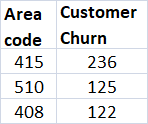

**Based on time spend and price paid**

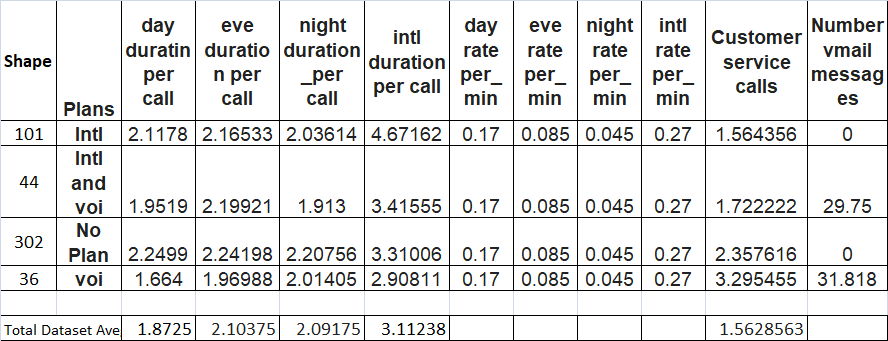



1. Looking at the average time duration of day, evening, night and international per call campare to whole there is is nothing to point out.
2. **Subscription prices** of **international plan, voice mail plan**, those who have take **both international and voice mail plan** and those who have take **no plan** are extactly **same**. This alone contributed major reason for customer churn rate as it's unfair for heavy users compare to those who are average to less telecom users.

***Customer service calls average is 1.563 for entire dataset ***

*   **Customer service average** of those who has taken **both international plan and voice mail plan is 1.722** , slightly above average can contribute to churn rate.
*   **Customer service  average for voice mail plan is 3.3** which is very unsatisfactory for customer.
*   **Customer service average for cutomers with no plan is 2.357** which is unsatisfactory for customer.


**Area based**

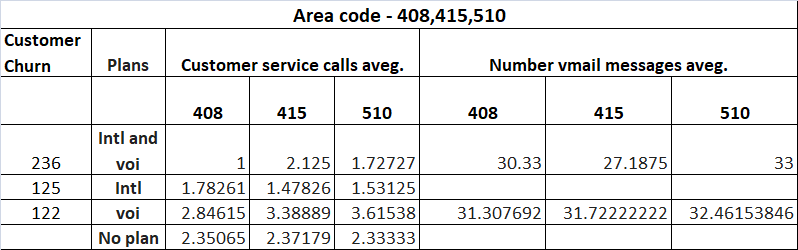

* Areacode based analysis for customer points out same that for **subscription prices for both International and voice mail plan** compared to customer with **no plan** are **same**.
* **Customers with no plan and voice mail plan are unhappy with customer service** same as above.
* There is an interesting factor of number of voice message send for all areacode that they are below average
* Means one customer can spend 50 voice meassages and the average rate for number of meassage sending is 42-43 but most majority of customers is sending 16-35 meassages only.
* Reason for this is uncertain with the data provided it can be individual customer choice,  can be network range problem, can be maintenance or installation problem.
* **Common states where most customer churn**:

 **['NV', 'MN', 'NJ', 'KS', 'WV', 'GA', 'MI', 'NC', 'SD', 'MA']**
* Reason for majority state churn is also uncertain with the data provided it can be individual customer choice,  can be network range problem, can be maintenance or installation problem.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart 1: Churn to unchurn data pie chart

Text(0, 0.5, 'Churn rate')

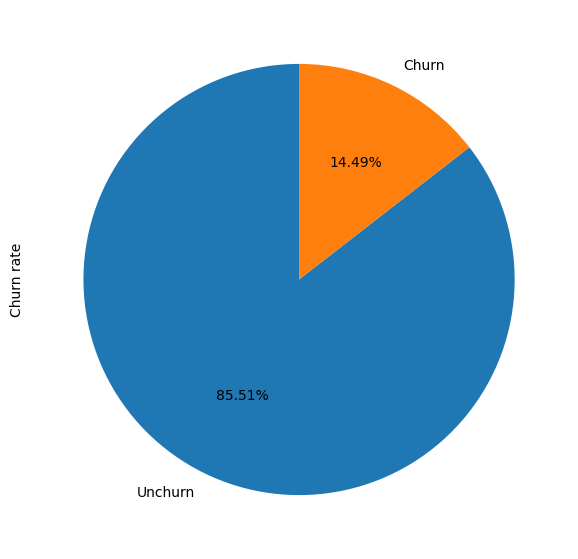

In [ ]:
# Pie chart of 'Churn' variable of dataset
ax=df['Churn'].value_counts().plot(kind='pie',figsize=(8,7),startangle=90,autopct='%1.2f%%',labels=['Unchurn','Churn'])
ax.set_ylabel('Churn rate')

1. Why did you pick the specific chart?
* pie chart shows each segmentand sector representing a piece of the whole pie chart(percentage). And here I have to show company's churn to un churn data of customer

2. What is/are the insight(s) found from the chart?

* The above chart shows there are  False: 2850 customers who did not churned contributes 85.51% and True:  483 customers who churned contributes 14.49% of the whole dataset.





3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Customer churn, also known as customer attrition or defection, represents the rate at which customers are lost. Telecom companies frequently employ customer churn as a vital business metric to anticipate the number of customers expected to discontinue services with a telecom service provider. The significance of churn in the telecommunications industry is substantial as it directly impacts the competitiveness of the service provider.
* Customers feedback matters most not to just company but to their friends/family also. People trust eachother feedback in terms of service provider.

### Chart 2: International plan  customers churn/unchurn visualization




In [ ]:
# value counts for international plan for plotting
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

<Axes: ylabel='International plan'>

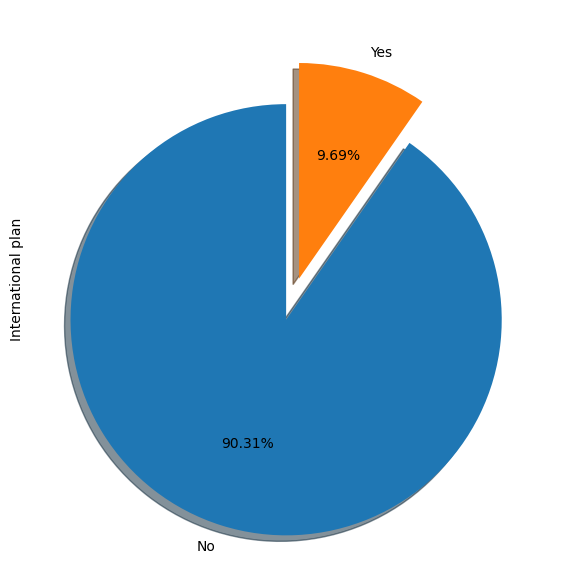

In [ ]:
# Plot 1

# Cutomers with or without internatioanl plan in dataset
df['International plan'].value_counts().plot(kind='pie',figsize=(10,7), autopct="%1.2f%%", startangle=90, shadow=True, labels=['No','Yes'], explode=[.2,0])

In [ ]:
df.groupby('International plan')['Churn'].value_counts()

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

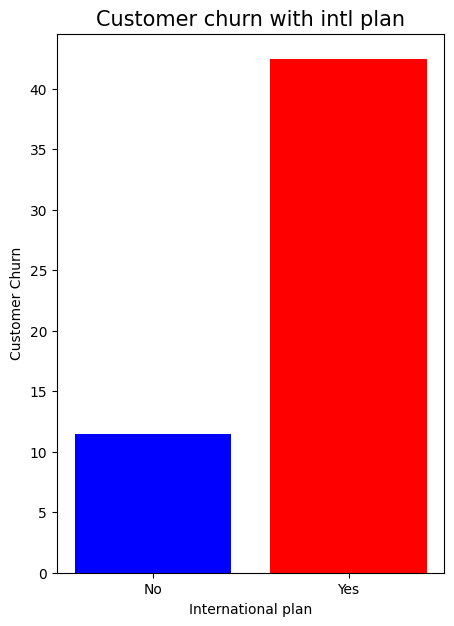

In [ ]:
# Plot 2
# Bar plot for customer churn with internatioanl plan

plt.rcParams['figure.figsize']=(5,7)
plt.bar(df['International plan'].unique(),df.groupby('International plan')['Churn'].mean()*100,color=['blue','red'])
plt.title('Customer churn with intl plan', fontsize= 15)
plt.xlabel('International plan')
plt.ylabel('Customer Churn')
plt.show()

In [ ]:
# storing customer with internatioanl plan
intl_yes=df[df['International plan']=='Yes']
# storing average minutes talk whith churn/unchurn customers with internatioanl plan
y=intl_yes.groupby('Churn').agg({'Total eve minutes':'mean','Total day minutes':"mean",'Total night minutes':'mean','Total intl minutes':'mean'})
y

,Total eve minutes,Total day minutes,Total night minutes,Total intl minutes
Churn,,,,
False,199.982258,183.833871,197.713978,9.777957
True,209.305839,193.625547,194.640146,11.782482


       ave eve minutes	    ave day minutes	       ave night minutes	   ave intl minutes
Churn
False	 199.982258	        183.833871	         197.713978	             9.777957
True	   209.305839	        193.625547	         194.640146	            11.782482




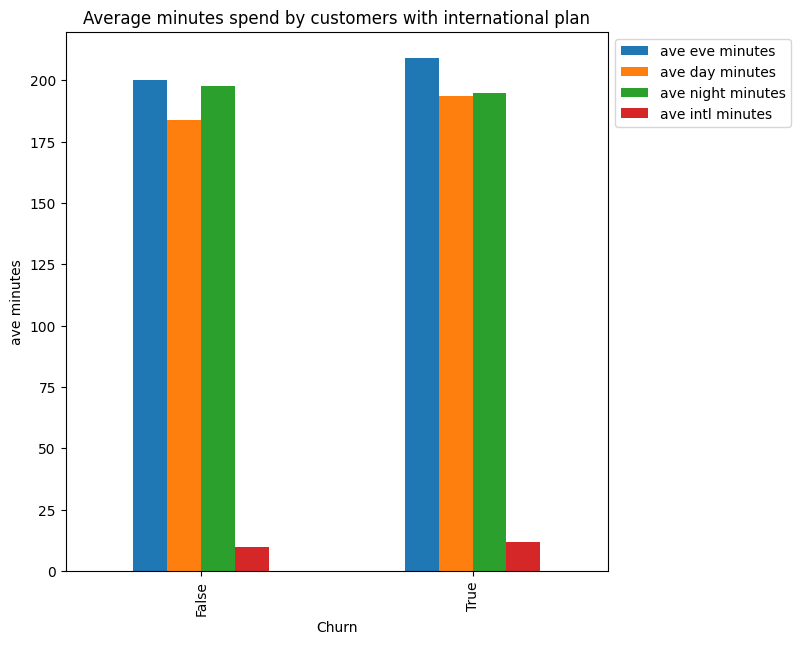

In [ ]:
# Plot 3
# Average minutes spend by churn-unchurn cutomers with international paln

print("       ave eve minutes	    ave day minutes	       ave night minutes	   ave intl minutes")
print('Churn')
print('False	 199.982258	        183.833871	         197.713978	             9.777957')
print("True	   209.305839	        193.625547	         194.640146	            11.782482")
print('\n')

plt.rcParams['figure.figsize']=(7,7)
ax=y.plot(kind='bar')
label=['ave eve minutes',	'ave day minutes',	'ave night minutes',	'ave intl minutes']
plt.title("Average minutes spend by customers with international plan")
plt.xlabel("Churn")
plt.ylabel("ave minutes")
ax.legend(label,bbox_to_anchor=(1,1))
plt.show()



In [ ]:
# storing customer without internatioanl plan
intl_no=df[df['International plan']=='No']
# storing average minutes talk whith churn/unchurn customers without interantional plan
n=intl_no.groupby('Churn').agg({'Total eve minutes':'mean','Total day minutes':"mean",'Total night minutes':'mean','Total intl minutes':'mean'})
n

,Total eve minutes,Total day minutes,Total night minutes,Total intl minutes
Churn,,,,
False,198.977740,174.571246,200.302102,10.185473
True,213.639306,212.175723,209.425434,10.271387


                  ave eve minutes	  ave day minutes   	ave night minutes 	ave intl minutes
Churn
False	          198.977740	          174.571246       	  200.302102	           10.185473
True	          213.639306	          212.175723	          209.425434	           10.271387




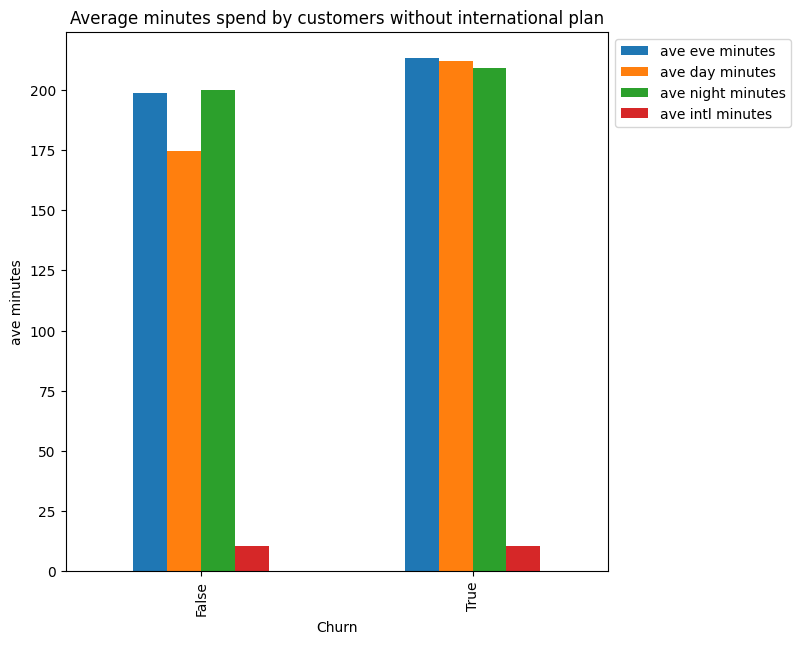

In [ ]:
# Plot 4
# Average minutes spend by churn-unchurn cutomers without international paln

print('                  ave eve minutes	  ave day minutes   	ave night minutes 	ave intl minutes')
print('Churn')
print('False	          198.977740	          174.571246       	  200.302102	           10.185473')
print('True	          213.639306	          212.175723	          209.425434	           10.271387')
print('\n')

plt.rcParams['figure.figsize']=(7,7)
ax=n.plot(kind='bar')
label=['ave eve minutes',	'ave day minutes',	'ave night minutes',	'ave intl minutes']
plt.title("Average minutes spend by customers without international plan")
plt.xlabel("Churn")
plt.ylabel("ave minutes")
ax.legend(label,bbox_to_anchor=(1,1))
plt.show()



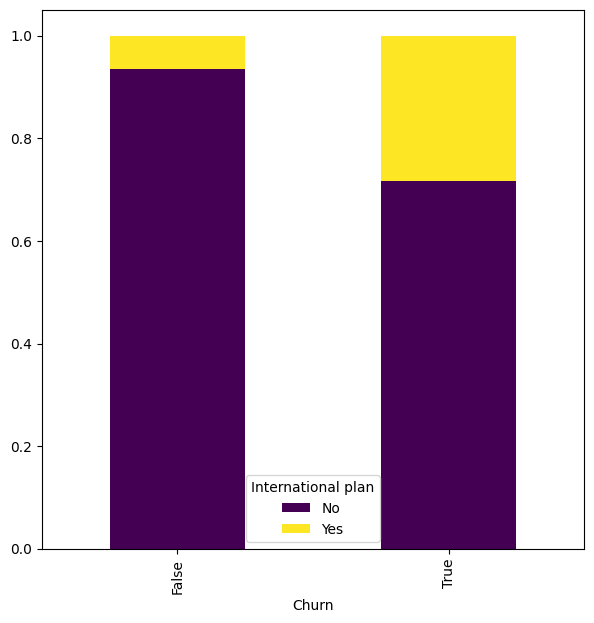

In [ ]:
# Heatmap for Churn and International plan
pd.crosstab(df['Churn'], df['International plan'], normalize='index').plot(kind='bar', stacked=True, cmap='viridis')
plt.show()

1. Why did you pick the specific chart?
* pie chart shows each segmentand sector representing a piece of the whole pie chart(percentage). And here I have to show customers with/without international plan.
* A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.
* I have used bar chart for cutomers with/without international plan their churn rate, compare average of each duration minutes.
*  Use of a heatmap using a stacked bar plot to visualize the relationship between two categorical variables: 'Churn' and 'International plan'


2. What is/are the insight(s) found from the chart?
* customers with international plan are 323 and without internatioanal plan are
 3010.
 * International plan  Churn/unchurn rate

    No

                    False    2664
                    True      346
Yes

                    False     186
                    True      137
*  Among those with international plan 42.4 % cutomers churn and without international plan only 11.4 % customers churn.
* If we compare average minutes people talk in day,eve,night are much higher than average intl minutes which is expected.
* customers with internatioanl plan  churned & unchurned average international minutes talk is 11.782 & 9.778 respectively whereas customers without internatioanl plan  churned & unchurned average international minutes talk is 10.185 & 10.271 respectively.
* point I'm making is cutomers with international plan tends to churn more because of same rate of subscription for both with/without internatioanl plan.
* There is no gain for subscription of internatioanal plan.

3. Will the gained insights help creating a positive business impact?
* Certainly, the discovered insights are poised to generate a positive impact on the business. Individuals with an international plan incur additional charges, yet the talk time value charge remains the same as customers without an international plan. This discrepancy might be a significant reason for increased churn among those with an international plan.
* Heatmap can be used for visualize how the churn is distributed based on whether customers have an international plan or not.






### Chart 3: Voice mail plan  customers visualization

<Axes: ylabel='Voice mail plan'>

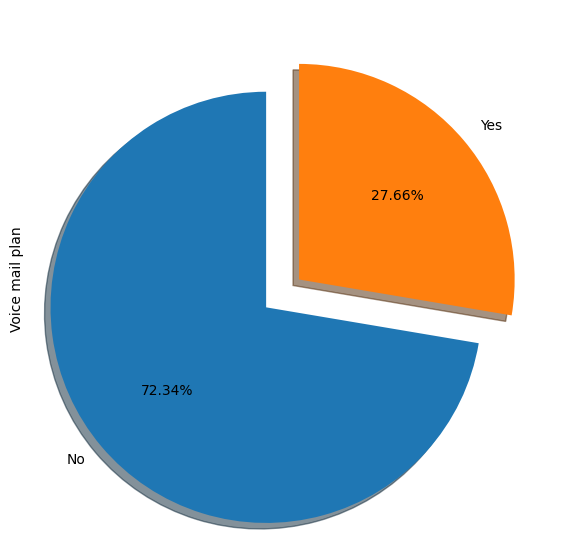

In [ ]:
# plot 1
# Cutomers with or without voice mail plan in dataset
df['Voice mail plan'].value_counts().plot(kind='pie',figsize=(10,7), autopct="%1.2f%%", startangle=90, shadow=True, labels=['No','Yes'], explode=[.2,0])

In [ ]:
df.groupby('Voice mail plan')['Churn'].value_counts()

Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
Name: Churn, dtype: int64

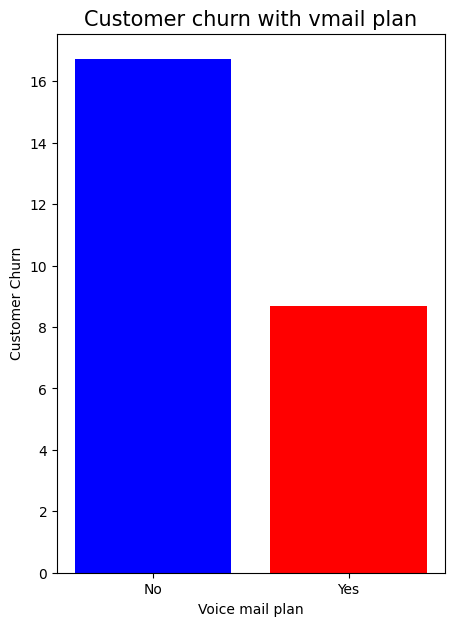

In [ ]:
# Plot 2
# Bar plot of customer churn with international plan in percentage
plt.rcParams['figure.figsize']=(5,7)
plt.bar(['No','Yes'],df.groupby('Voice mail plan')['Churn'].mean()*100,color=['blue','red'])
plt.title('Customer churn with vmail plan', fontsize= 15)
plt.xlabel('Voice mail plan')
plt.ylabel('Customer Churn')
plt.show()

1. Why did you pick the specific chart?
* pie chart shows each segmentand sector representing a piece of the whole pie chart(percentage). And here I have to showed cutomers with/without voice mail plan.
* A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.
* I have used bar plot chart to show churn/unchurn rate.

2. What is/are the insight(s) found from the chart?

* Cutomers with voice mail plan are 922 and without voice mail plan are 2411
 * Voive mail plan churn rate

 No  
                 False    2008
                 True      403
Yes   
                 False     842
                 True       80


3. Will the gained insights help creating a positive business impact?
* Reason for business impact is uncertain with the data provided it can be individual customer choice, can be network range problem, can be maintenance or installation problem. Hence cannot be determined.

### Chart 4: Area vise visualization

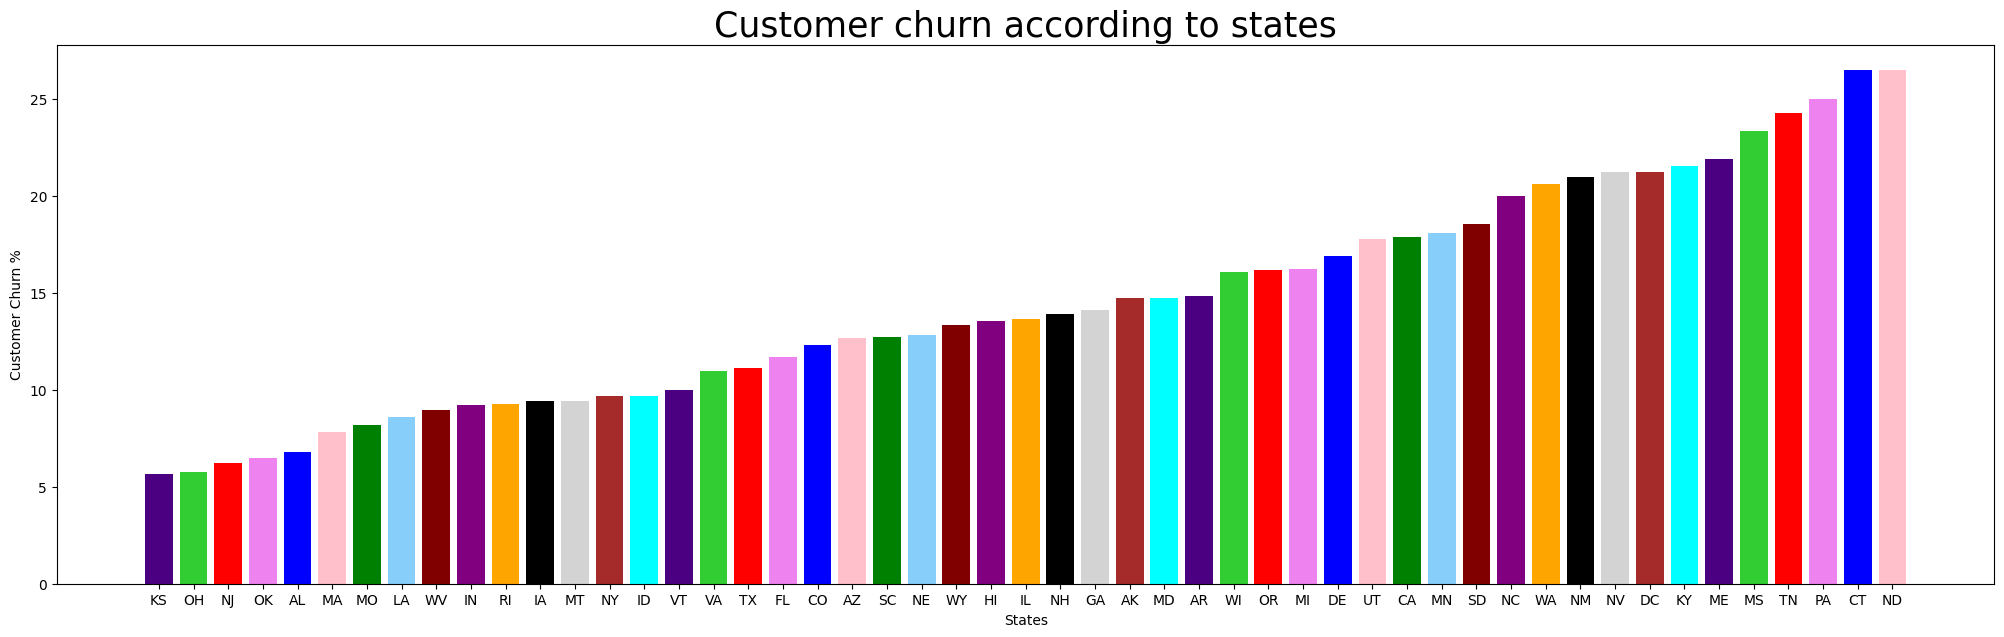

In [ ]:
# Plot 1
# Bar plot for customer churn % across states

plt.rcParams['figure.figsize']=(25,7)
plt.bar(df['State'].unique(),(df.groupby('State')['Churn'].mean()*100).sort_values(ascending=True),color=['indigo','limegreen','red','violet','blue','pink','green','lightskyblue','maroon','purple','orange','black','lightgray','brown','aqua'])
plt.title('Customer churn according to states', fontsize= 25)
plt.xlabel('States')
plt.ylabel('Customer Churn %')
plt.show()

# click on chart to get bigger view

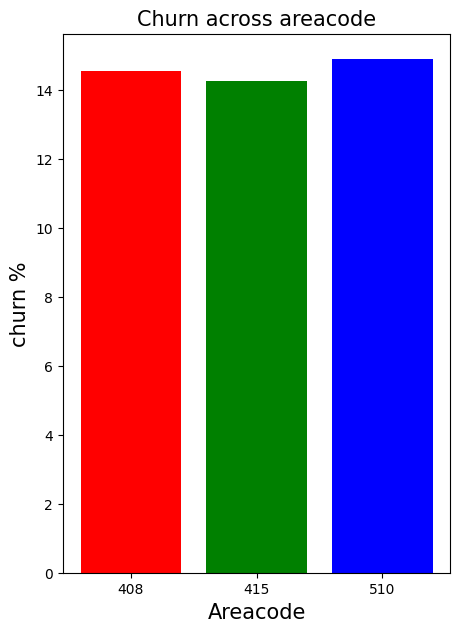

In [ ]:
# Plot 2
# Bar plot for customer churn % across areacode
plt.rcParams["figure.figsize"]=(5,7)
plt.bar(['408','415','510'],(df.groupby('Area code')['Churn'].mean()*100),color=['r','g','b'])
plt.title('Churn across areacode',fontsize=15)
plt.xlabel('Areacode',fontsize=15)
plt.ylabel('churn %',fontsize=15)
plt.show()

In [ ]:
print(list((df.groupby('State')['Churn'].mean()*100).sort_values(ascending=False)))

[26.47058823529412, 26.47058823529412, 25.0, 24.285714285714285, 23.333333333333332, 21.91780821917808, 21.53846153846154, 21.21212121212121, 21.21212121212121, 20.967741935483872, 20.588235294117645, 20.0, 18.571428571428573, 18.072289156626507, 17.857142857142858, 17.77777777777778, 16.923076923076923, 16.216216216216218, 16.176470588235293, 16.071428571428573, 14.814814814814813, 14.754098360655737, 14.754098360655737, 14.102564102564102, 13.88888888888889, 13.636363636363635, 13.559322033898304, 13.333333333333334, 12.82051282051282, 12.698412698412698, 12.676056338028168, 12.32876712328767, 11.688311688311687, 11.11111111111111, 10.95890410958904, 10.0, 9.67741935483871, 9.67741935483871, 9.433962264150944, 9.433962264150944, 9.25925925925926, 9.230769230769232, 8.974358974358974, 8.620689655172415, 8.19672131147541, 7.8431372549019605, 6.8181818181818175, 6.493506493506493, 6.25, 5.769230769230769, 5.660377358490567]


1. Why did you pick the specific chart?
* To show percentage of customer churned according to states and areacode I pick bar chart

2. What is/are the insight(s) found from the chart?
* customer churn  across all areacode is 14-15%
* customer churn % across state
* States where most customer churn in percentage:
 * NJ-26.47 , CA-26.47 , TX-25.00 , MD-24.286 , SC-23.33,

   MI-21.92 ,  MS-21.54 ,  NV-21.21 , WA-21.21 ,  ME-20.97
 * total-  21.74% which is more than 50% of average churn rate.
* Reason can be anything, it cannot be determined with data provided

  

  

   




3. Will the gained insights help creating a positive business impact?
* Indeed, the state-wise churn data reveals that a 10% churn rate in a larger state is equivalent to a 20% churn rate in a smaller state. Therefore, it is imperative not to overlook churn rates and instead segregate the analysis based on the respective states' coverage areas. However, in prioritizing actionable tasks, it is advisable to address issues in the top 10 states with high churn rates first.

* Potential issues could stem from factors such as inadequate network coverage, insufficient maintenance of existing antennas, low total area coverage, a scarcity of mobile towers or users, or the need to install new towers for expanded coverage in additional areas.
*  areacode doesn't impact much

### Chart 5:  Customer Service Calls

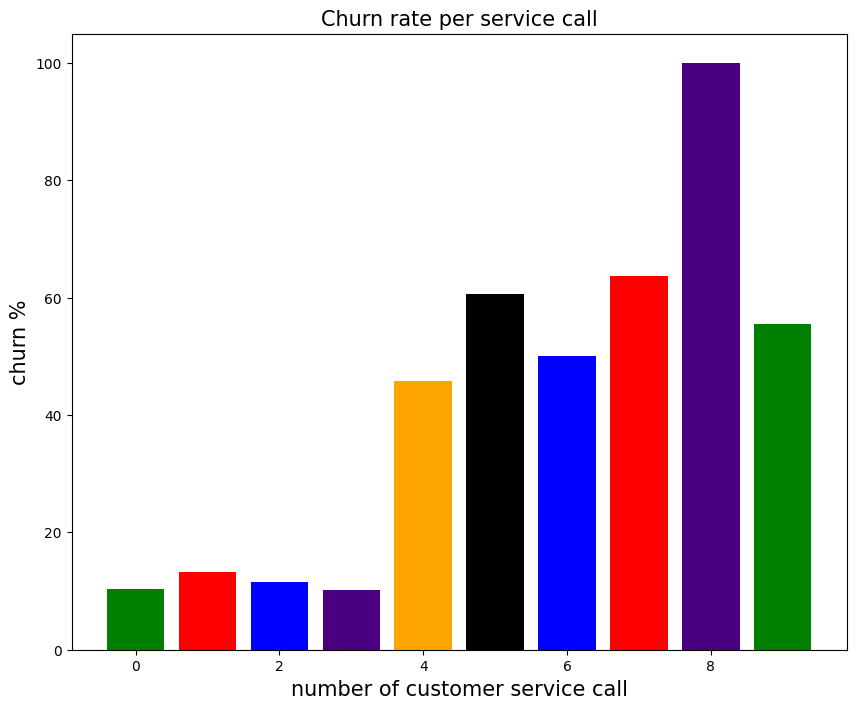

In [ ]:
# Customer churn with customer service calls variable
plt.rcParams['figure.figsize'] = (10, 8)
plt.bar(df['Customer service calls'].unique(),df.groupby(['Customer service calls'])['Churn'].mean()*100, color = ['r','g','b','indigo','orange','black'])
plt.title("Churn rate per service call", fontsize = 15)
plt.xlabel('number of customer service call', fontsize = 15)
plt.ylabel('churn %', fontsize = 15)
plt.show()

1. Why did you pick the specific chart?
* To show percentage of customer churned according to number of cutomer service call I pick bar chart

2. What is/are the insight(s) found from the chart?
* max customer service calls is 9
* Customers with 4 or more customer service calls tends to churn more as their probability percentage exceeds 50%

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Effective customer service is a pivotal element for any business, undoubtedly contributing to a positive impact on overall operations. It is imperative to manage customer calls and promptly resolve queries, aiming to optimize resolution duration. Identifying recurring issues from four or more customers warrants a thorough root cause analysis and subsequent resolution for all affected customers. Striving to minimize the number of calls per customer is crucial, with the goal of achieving customer satisfaction within a single call.


### Chart 6: Time,charge against 'Churn' variable

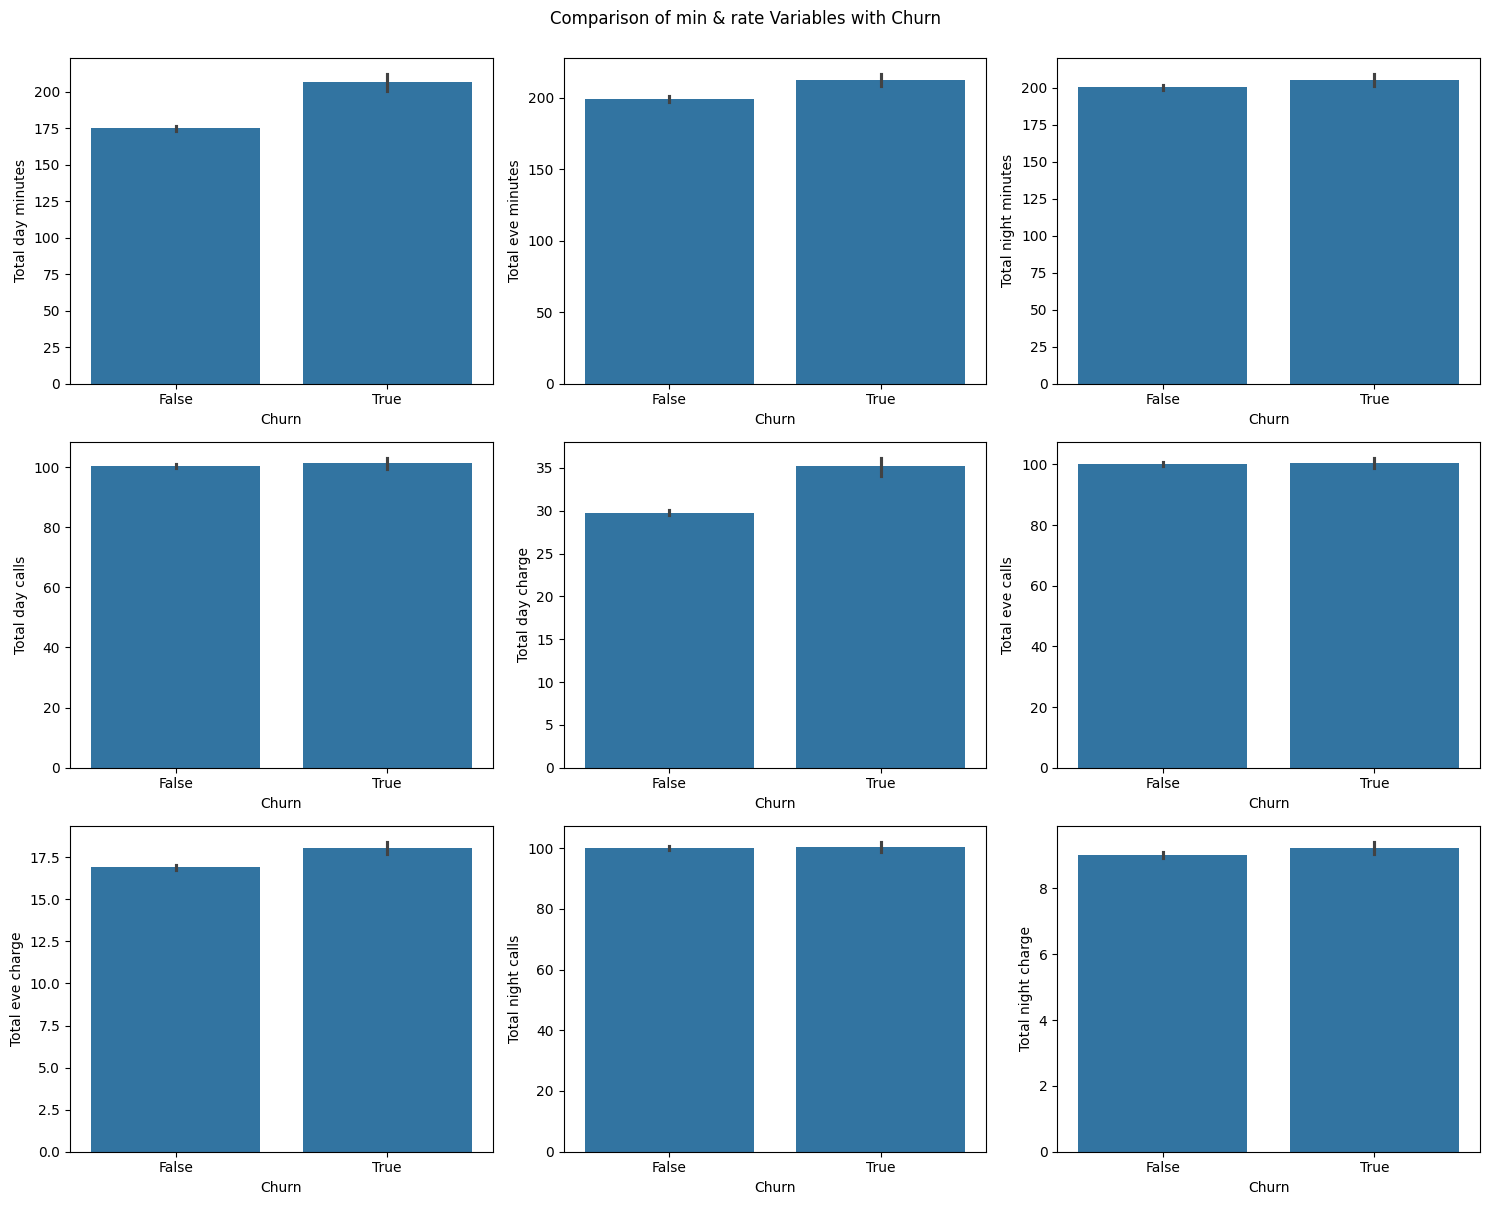

In [87]:
# Select the relevant columns from the DataFrame
selected_columns = ['Total day minutes', 'Total eve minutes', 'Total night minutes',
                     'Total day calls', 'Total day charge', 'Total eve calls','Total eve charge',
                     'Total night calls', 'Total night charge', 'Churn']

# Creating a DataFrame with the selected columns
selected_df = df[selected_columns]

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Comparison of min & rate Variables with Churn', y=1.00)

# Loop through selected columns and create bar plots
for i, column in enumerate(selected_columns[:-1]):
    row, col = divmod(i,3)
    sns.barplot(x='Churn', y=column, data=selected_df, ax=axes[row, col])

# Adjust the layout
plt.tight_layout()
plt.show()

### Chart 7: Correlation Heatmap

<ipython-input-83-169520498f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


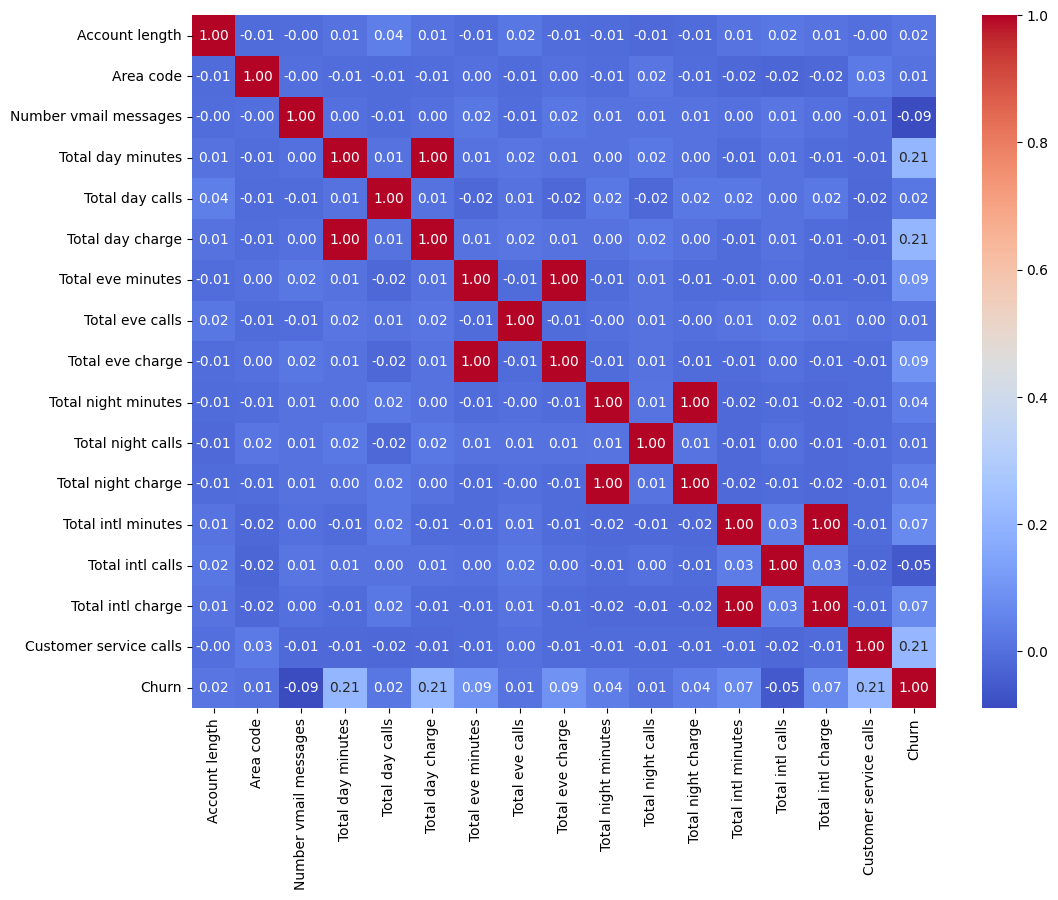

In [ ]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

1. Why did you pick the specific chart?
* A correlation heatmap is a visual representation of the correlation matrix, where each cell represents the correlation coefficient between two variables. The heatmap is color-coded to highlight the strength and direction of the correlation.

2. What is/are the insight(s) found from the chart?
* Strong Positive Correlation (Close to 1.00):

Total day minutes and Total day charge have a strong positive correlation of approximately 1.00. This is expected as the charge for the day is directly related to the number of minutes used during the day.
* Strong Positive Correlation (Close to 1.00):

Total eve minutes and Total eve charge also have a strong positive correlation of approximately 1.00. Similar to the day, the charge for the evening is directly related to the number of minutes used during the evening.
* Moderate Positive Correlation (Around 0.21):

Total day minutes and Churn have a moderate positive correlation of around 0.21. This indicates that higher total day minutes may be associated with a slightly higher likelihood of churn.
* Weak Positive Correlation (Around 0.09):

Total eve minutes and Churn have a weak positive correlation of around 0.09. This suggests a weaker association compared to the total day minutes.
* Negative Correlation (Around -0.09):

Number vmail messages and Churn have a negative correlation of around -0.09. This suggests that having a higher number of voicemail messages is weakly associated with a lower likelihood of churn.
* Other Correlations:

Various other correlations exist between different pairs of variables. For example, there are correlations between total call minutes, charges, and international calls.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
* correlation does not imply causation, and these observations are based solely on the numerical correlation values provided. It's always essential to interpret correlations in the context of your specific dataset and the relationships between variables.







### Chart 8: overall relations

In [ ]:
# Seaborn pairplot
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

1. Why did you pick the specific chart?
* To explore relationships between multiple numerical variables, I have use a pair plot. This plot provides scatterplots for numerical variables and histograms for each variable.
* it's like a visualization of correlation heatmap for understanding pattern in charts or any relationship of variables.

2. What is/are the insight(s) found from the chart?

* Based on the chart above, it is evident that the variables exhibit a less linear relationship, and the data points are not linearly separable. The data of churned customers form clusters with significant overlap. Non-churn data, on the other hand, display a symmetrical nature, while churned customer data exhibit non-symmetrical patterns.
* The pair plot highlights the significance of the area code, and the insights derived from the number of churns concerning various features are particularly enlightening. Additional insights can be gleaned from the presented graph.

## **5. Solution to Business Objective**


* Adjust the International Plan to match the standard rate.
* Proactively engage in communication.
* Frequently seek feedback from customers.
* Periodically introduce offers to retain customers.
* Examine customers experiencing issues in high-churn states.
* Focus on cultivating relationships with top-performing customers.
* Conduct regular server maintenance.
* Address and resolve poor network connectivity issues.
* Establish a roadmap for onboarding new customers.
* Analyze churn occurrences when they happen.
* Remain competitive in the market.







# **Conclusion**

• Omitting the area code field and/or the state field is acceptable due to anomalies.

• Subscribers enrolled in the International Plan exhibit a higher tendency to churn.

• Customers making four or more customer service calls churn at a rate over four times greater than that of other customers.

• Subscribers with elevated day minutes and evening minutes experience a higher churn rate compared to their counterparts.

• No clear correlation between churn and variables such as day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voicemail messages is evident.

